# 🎬 IMDB Sentiment Analysis with RNN (LSTM)

This notebook demonstrates how to build and train a **Recurrent Neural Network (RNN)** using **LSTM layers** for sentiment classification on the **IMDB dataset**.

## 📌 1. Introduction
The IMDB dataset contains **25,000 movie reviews** labeled as either **positive** or **negative**. Our task is to build a model that can predict the sentiment of a review.

We will:
- Preprocess text data (convert words → tokens → padded sequences).
- Build an **Embedding + LSTM** model.
- Train the model on 20,000 reviews, validate on 5,000 reviews.
- Evaluate performance on a test set.
- Visualize training curves (accuracy and loss).


# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

## 📌 2. Load and Preprocess Data
We restrict the vocabulary to the **10,000 most frequent words** and truncate/pad reviews to a fixed length (200 words).

In [2]:
max_features = 10000  # Vocabulary size
maxlen = 200          # Max sequence length

In [3]:
print("Loading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 226s 13us/step


In [4]:
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

25000 train sequences
25000 test sequences


# Pad sequences to equal length

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (25000, 200)
x_test shape: (25000, 200)


## 📌 3. Build RNN Model (LSTM)
We use:
- **Embedding layer**: to convert tokens into dense vectors.
- **LSTM layer**: to capture sequential dependencies in reviews.
- **Dense output layer**: with **sigmoid** activation for binary classification.

In [7]:
model = Sequential()
model.add(Embedding(max_features, 128))       # Embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))     # Output layer

In [ ]:
## Compile model

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


## 📌 4. Train Model
We train the model for **5 epochs** with a batch size of **64**.

In [10]:
batch_size = 64
epochs = 5

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 125s 313ms/step - accuracy: 0.6938 - loss: 0.5668 - val_accuracy: 0.8158 - val_loss: 0.4170
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 332ms/step - accuracy: 0.8520 - loss: 0.3537 - val_accuracy: 0.8471 - val_loss: 0.3593
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 296ms/step - accuracy: 0.8793 - loss: 0.2975 - val_accuracy: 0.8433 - val_loss: 0.3751
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 295ms/step - accuracy: 0.9031 - loss: 0.2531 - val_accuracy: 0.8548 - val_loss: 0.3901
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 277ms/step - accuracy: 0.9254 - loss: 0.1989 - val_accuracy: 0.8366 - val_loss: 0.3885


## 📌 5. Evaluate Model
We check test accuracy after training.

In [12]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test score:", score)
print("Test accuracy:", acc)

391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.8342 - loss: 0.3955
Test score: 0.38847750425338745
Test accuracy: 0.8366000056266785


## 📌 6. Visualize Training History
We plot **training vs validation accuracy** and **training vs validation loss**.

In [13]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

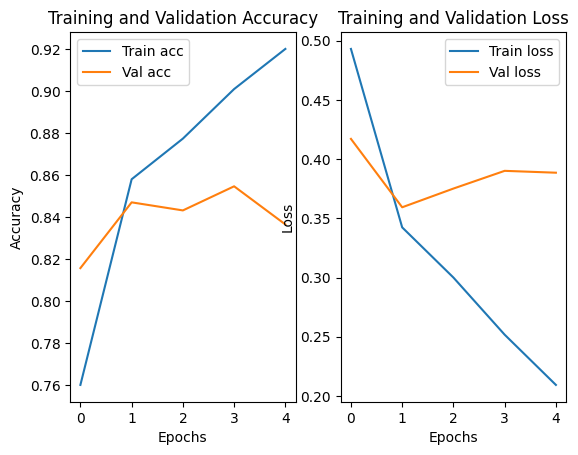

In [15]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 📌 7. Results & Insights
- The model typically achieves **~85% accuracy** on the IMDB test set.
- LSTM captures **long-term dependencies** in text better than simple RNNs.
- Adding **dropout & recurrent dropout** improves generalization.

✅ This model is a good baseline for text sentiment analysis!
